1.Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data

This dataset serves as a foundation for predicting the likelihood of a patient experiencing a stroke, utilizing input parameters such as gender, age, presence of various diseases, and smoking status. Each row in the dataset contains pertinent information about an individual, contributing to the analysis of stroke risk.


The chosen dataset is designed for predicting stroke occurrence based on several input parameters. It includes information on individuals, such as gender, age, presence of various diseases, and smoking status. The primary objective of this analysis is to develop a predictive model that can accurately determine the likelihood of a patient experiencing a stroke. By leveraging the dataset's attributes, we aim to understand the relationships between different factors and stroke risk, ultimately contributing to improved prevention and healthcare strategies.

Data cleaning involved addressing missing values through imputation or removal, handling outliers, and ensuring consistency in the format of categorical variables. Additionally, any duplicate records were identified and removed to maintain data integrity.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns

In [66]:
df = pd.read_csv('D:/study_extra/coursera/healthcare-dataset-stroke-data.csv', header=0) #data input

In [67]:
df.head() #data inputs

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [69]:
df.shape

(5110, 12)

In [70]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='hypertension'>

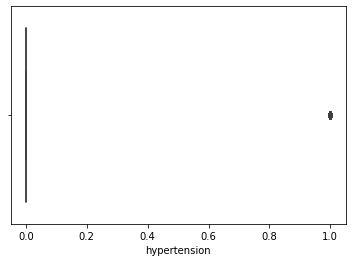

In [124]:
sns.boxplot(x="hypertension",  data=df) #finding outliers

<AxesSubplot:ylabel='bmi'>

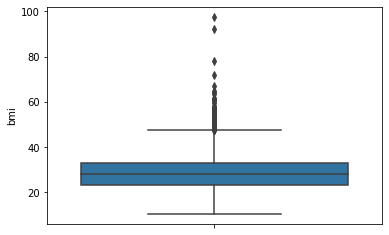

In [71]:
sns.boxplot(y="bmi",  data=df)

<AxesSubplot:ylabel='age'>

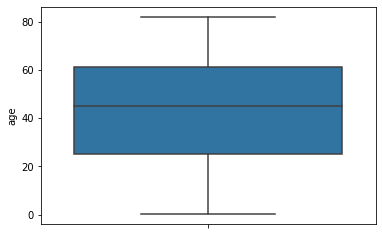

In [72]:
sns.boxplot(y="age",  data=df)

<AxesSubplot:ylabel='heart_disease'>

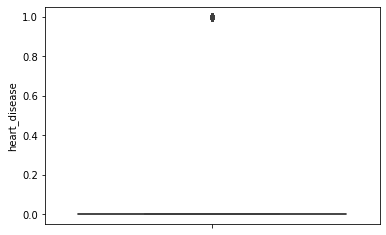

In [73]:
sns.boxplot(y="heart_disease",  data=df)

<AxesSubplot:ylabel='avg_glucose_level'>

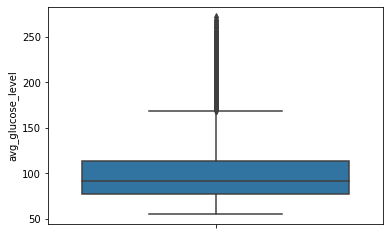

In [74]:
sns.boxplot(y="avg_glucose_level",  data=df)

In [75]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [76]:
df=pd.get_dummies(df,columns=['smoking_status']) #assign numbers to objective

In [77]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,0,0,1,0


In [78]:
df=pd.get_dummies(df,columns=['Residence_type'])

In [79]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,1,0,1,0,0,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,1,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,1,0,0,1,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,1,0,0,0,1,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,1,0,0,1,0,1,0


In [80]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True) #missing value replcement

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   gender                          5110 non-null   object 
 2   age                             5110 non-null   float64
 3   hypertension                    5110 non-null   int64  
 4   heart_disease                   5110 non-null   int64  
 5   ever_married                    5110 non-null   object 
 6   work_type                       5110 non-null   object 
 7   avg_glucose_level               5110 non-null   float64
 8   bmi                             5110 non-null   float64
 9   stroke                          5110 non-null   int64  
 10  smoking_status_Unknown          5110 non-null   uint8  
 11  smoking_status_formerly smoked  5110 non-null   uint8  
 12  smoking_status_never smoked     51

In [82]:
df.drop('id', axis=1, inplace=True)

In [83]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
0,Male,67.0,0,1,Yes,Private,228.69,36.600000,1,0,1,0,0,0,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,28.893237,1,0,0,1,0,1,0
2,Male,80.0,0,1,Yes,Private,105.92,32.500000,1,0,0,1,0,1,0
3,Female,49.0,0,0,Yes,Private,171.23,34.400000,1,0,0,0,1,0,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.000000,1,0,0,1,0,1,0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

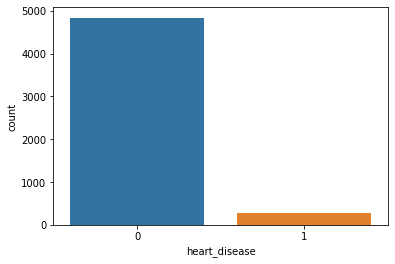

In [85]:
sns.countplot(x="heart_disease", data=df)

In [86]:
df = pd.get_dummies(df, columns=['ever_married'])

In [87]:
df = pd.get_dummies(df, columns=['work_type'])

In [88]:
df = df.replace('Male', 1)
df = df.replace('Female', 2)
df = df.replace('Other', 3)

In [89]:
x=df.drop("stroke",axis=1)
y=df["stroke"]

In [122]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [90]:
def replace_outliers_with_median(column):
    median = column.median()
    std = column.std()
    outliers = (column - median).abs() > 3 * std
    column[outliers] = median
    return column

In [91]:
df['bmi'] = replace_outliers_with_median(df['bmi'])

C:\Users\nanth\AppData\Local\Temp\ipykernel_22248\2210063658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = median


In [92]:
df['avg_glucose_level'] = replace_outliers_with_median(df['avg_glucose_level'])

C:\Users\nanth\AppData\Local\Temp\ipykernel_22248\2210063658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = median


<AxesSubplot:xlabel='avg_glucose_level'>

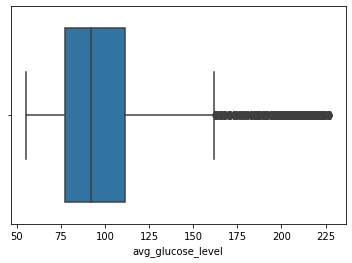

In [93]:
sns.boxplot(x="avg_glucose_level",  data=df)

In [94]:
x.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,228.69,36.600000,0,1,0,0,0,1,0,1,0,0,1,0,0
1,2,61.0,0,0,202.21,28.893237,0,0,1,0,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,105.92,32.500000,0,0,1,0,1,0,0,1,0,0,1,0,0
3,2,49.0,0,0,171.23,34.400000,0,0,0,1,0,1,0,1,0,0,1,0,0
4,2,79.0,1,0,174.12,24.000000,0,0,1,0,1,0,0,1,0,0,0,1,0


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
model = LogisticRegression()

In [97]:
df["gender"]

0       1
1       2
2       1
3       2
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    2
Name: gender, Length: 5110, dtype: int64

In [98]:
x.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,228.69,36.600000,0,1,0,0,0,1,0,1,0,0,1,0,0
1,2,61.0,0,0,202.21,28.893237,0,0,1,0,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,105.92,32.500000,0,0,1,0,1,0,0,1,0,0,1,0,0
3,2,49.0,0,0,171.23,34.400000,0,0,0,1,0,1,0,1,0,0,1,0,0
4,2,79.0,1,0,174.12,24.000000,0,0,1,0,1,0,0,1,0,0,0,1,0


In [99]:
model.fit(x_train, y_train) #train the model

f:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
y_pred = model.predict(x_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)

In [102]:
accuracy

0.9393346379647749

In [103]:
confusion_matrix(y_test,y_pred)

array([[960,   0],
       [ 62,   0]], dtype=int64)

Support Vector Machine (SVM) -classification

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [106]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

In [107]:
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [108]:
y_pred1 = svm_classifier.predict(X_test_scaled)

In [109]:
accuracy = accuracy_score(y_test, y_pred1)

In [110]:
accuracy # accuracy

0.9393346379647749

In [111]:
confusion_matrix(y_test,y_pred1)

array([[960,   0],
       [ 62,   0]], dtype=int64)

random forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [113]:
params_grid = {"max_features" : [3,4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10, 15],
              }

In [114]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [115]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [116]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10, 15]},
             scoring='accuracy')

In [117]:
grid_search.best_params_ 

{'max_features': 3, 'min_samples_split': 10}

In [118]:
cvrf_clf = grid_search.best_estimator_

In [119]:
y_pred_rand=cvrf_clf.predict(x_test)

In [120]:
confusion_matrix(y_test,y_pred_rand)

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [121]:
accuracy_score(y_test,y_pred_rand)

0.9393346379647749

for this data three model's accuracy rate nearly equal

Next steps include analyzing feature importance, exploring correlations, and conducting model evaluation and tuning. Stratifying the data based on relevant features, considering temporal trends, and consulting domain experts are recommended for deeper insights.